In [14]:
import numpy as np
import cmath
import matplotlib.pyplot as plt

In [15]:
PI = np.pi

In [16]:
def f1(t):
    return 0.7 * np.sin(4 * PI * t) + np.sin(10 * PI * t)

def f2(t):
    return 0.7 * np.cos(4 * PI * t) + np.sin(10 * PI * t) + 0.3 * (np.random.randint(2))

In [17]:
class FFT:
    def __init__(self, func):
        self.f = func
        self.two = complex(2.0, 0.0)

    def init(self, n):
        self.n = n
        self.fn = np.array([self.f(float(i) / n) for i in range(n)], dtype=complex)
        self.gn = np.zeros(n, dtype=complex)
        self.fn_1 = np.zeros(n, dtype=complex)

    def FT(self, Fn, num):
        if num == 1:
            return Fn
        wn = cmath.rect(1.0, -2 * PI / num)
        w = 1.0
        f0 = Fn[::2]
        f1 = Fn[1::2]
        g0 = self.FT(f0, num // 2)
        g1 = self.FT(f1, num // 2)
        g = np.zeros(num, dtype=complex)
        for k in range(num // 2):
            g[k] = (g0[k] + w * g1[k]) / self.two
            g[k + num // 2] = (g0[k] - w * g1[k]) / self.two
            w *= wn
        if num == self.n:
            self.gn[:] = g
        return g

    def IFT(self, Gn, num):
        if num == 1:
            return Gn
        wn = cmath.rect(1.0, 2 * PI / num)
        w = 1.0
        f0 = Gn[::2]
        f1 = Gn[1::2]
        g0 = self.IFT(f0, num // 2)
        g1 = self.IFT(f1, num // 2)
        g = np.zeros(num, dtype=complex)
        for k in range(num // 2):
            g[k] = (g0[k] + w * g1[k])
            g[k + num // 2] = (g0[k] - w * g1[k])
            w *= wn
        if num == self.n:
            self.fn_1[:] = g
        return g

    def print_g_components(self):
        for i in range(self.n):
            print(f'g[{i}] = {self.gn[i].real} + {self.gn[i].imag}i')

In [18]:
def plot_origin(f, n, title):
    fft = FFT(f)
    fft.init(n)
    fft.FT(fft.fn, fft.n)
    fft.IFT(fft.gn, fft.n)
    plt.scatter(np.arange(n), np.real(fft.fn), label=f'Original n={n}',c="gray",alpha=0.7)

In [19]:
def plot_fft_results(f, n, title):
    fft = FFT(f)
    fft.init(n)
    fft.FT(fft.fn, fft.n)
    freqs = [i for i in range(1,n+1)]
    plt.plot(freqs, np.abs(fft.gn), label=f'Fft n={n}',c='r')

In [20]:
def plot_function_and_ifft(f, n, title):
    fft = FFT(f)
    fft.init(n)
    fft.FT(fft.fn, fft.n)
    fft.IFT(fft.gn, fft.n)
    plt.plot(np.arange(n), np.real(fft.fn_1), label=f'Reconstructed n={n}', c='g')

In [21]:
def plot_f2_with_partial_ifft(n):
    fft = FFT(f2)
    fft.init(n)
    fft.FT(fft.fn, fft.n)
    
    partial_gn = np.zeros(n, dtype=complex)
    partial_gn[:n // 4] = fft.gn[:n // 4]
    fft.IFT(partial_gn, fft.n)

    plt.plot(np.arange(n), np.real(fft.fn_1), label=f'Partial IFT n={n}', c='b')

In [22]:
n_values = [2**4, 2**7]

# Output FFT results
for f, fname in zip([f1, f2], ['f1', 'f2']):
    for n in n_values:
        print(f'\nResults for {fname} with n={n}')
        fft = FFT(f)
        fft.init(n)
        fft.FT(fft.fn, fft.n)
        fft.print_g_components()


Results for f1 with n=16
g[0] = -1.4591779461686526e-16 + 0.0i
g[1] = 3.74352356428987e-17 + 1.5918155316847247e-17i
g[2] = 1.3113417980196747e-16 + -0.3500000000000001i
g[3] = 4.104616460962996e-17 + 1.6653345369377348e-16i
g[4] = -2.0102263481345107e-19 + 1.1796119636642286e-16i
g[5] = -3.2082354736272135e-16 + -0.5i
g[6] = -1.0602222261798306e-16 + -5.551115123125783e-17i
g[7] = 1.5296969529030654e-16 + -1.7838551188734473e-16i
g[8] = 3.120492030410118e-16 + 0.0i
g[9] = 1.2771882666568882e-16 + 2.3388202522381295e-16i
g[10] = -4.0997513292268284e-17 + 1.1102230246251565e-16i
g[11] = -3.834263259242026e-16 + 0.5i
g[12] = -2.010226348134804e-19 + -1.1796119636642286e-16i
g[13] = 7.606744310955589e-17 + -1.942890293094024e-16i
g[14] = 7.059261680028785e-17 + 0.35000000000000003i
g[15] = 4.857608412232044e-17 + -7.141466865331549e-17i

Results for f1 with n=128
g[0] = 1.2759147776309221e-18 + 0.0i
g[1] = 6.035182601442681e-19 + 2.677694427786778e-17i
g[2] = -2.063522187786148e-17 + -0.

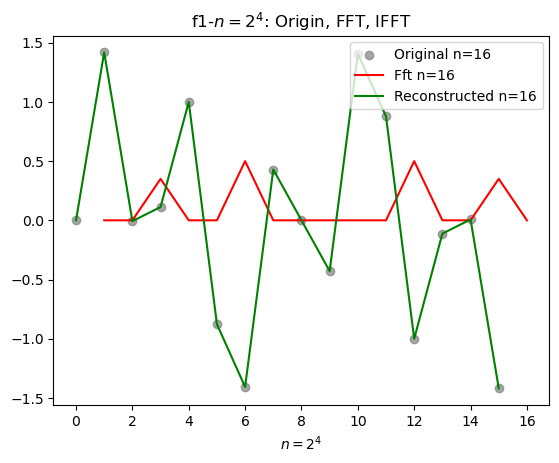

In [23]:
plot_origin(f1, n_values[0], 'Origin of f1')
plot_fft_results(f1, n_values[0], 'FFT of f1')
plot_function_and_ifft(f1, n_values[0], 'f1 and IFFT')
plt.xlabel("$n=2^4$")
plt.title("f1-$n=2^4$: Origin, FFT, IFFT")
plt.legend()
plt.show()

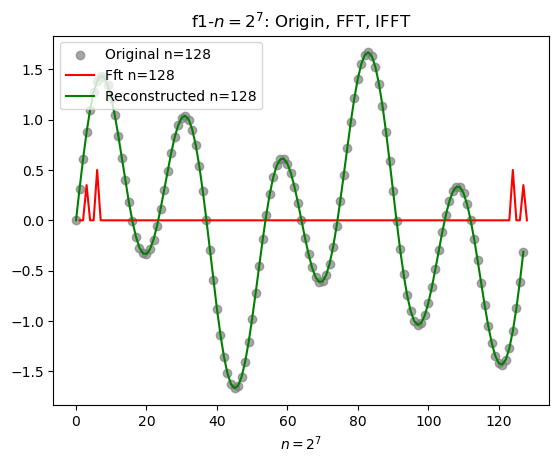

In [24]:
plot_origin(f1, n_values[1], 'Origin of f1')
plot_fft_results(f1, n_values[1], 'FFT of f1')
plot_function_and_ifft(f1, n_values[1], 'f1 and IFFT')
plt.xlabel("$n=2^7$")
plt.title("f1-$n=2^7$: Origin, FFT, IFFT")
plt.legend()
plt.show()

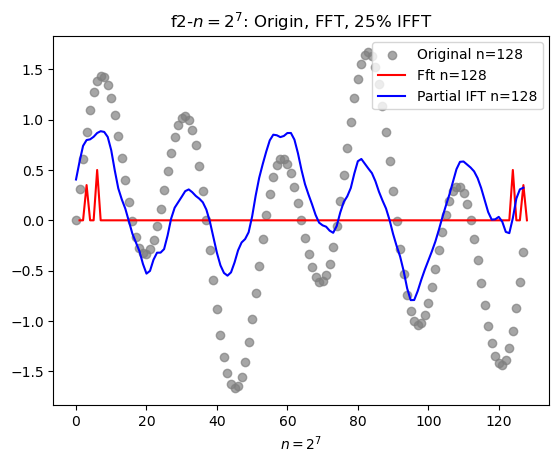

In [25]:
plot_origin(f1, n_values[1], 'Origin of f1')
plot_fft_results(f1, n_values[1], 'FFT of f1')
plot_f2_with_partial_ifft(n_values[1])
plt.xlabel("$n=2^7$")
plt.title("f2-$n=2^7$: Origin, FFT, 25% IFFT")
plt.legend()
plt.show()